In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_precision_recall_curve, balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import  PolynomialFeatures, scale
import matplotlib.pyplot as plt
import pandas as pd
from  sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.feature_selection import RFECV

training_path = 'data/data_train0.csv'
test_path = 'data/data_test.csv'


In [ ]:
def runLogisticModel(x,y):
    
    return 

def runSvmModel(x,y):
    C=0.1
    kernel = 'rbf'
    gamma= 'auto'
    class_weight='balanced'
    decision_function_shape= 'ovr'
    tol = 1e-3
    
    SVM = svm.SVC(C=C, kernel = kernel,
                  gamma= gamma, degree = degree, class_weight=class_weight, 
                  decision_function_shape= decision_function_shape, tol=tol)
    
    SVM = SVM.fit(x,y)        
    return SVM

def runRandomForestModel(x,y):
    
    n_estimators=50
    max_leaf_nodes=20
    min_samples_split=0.01
    n_jobs=-1
    class_weight='balanced'
    
    RFC = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes,   
                                 min_samples_split=min_samples_split, n_jobs=n_jobs, 
                                 class_weight='balanced')
    RFC = clf.fit(x,y)
    return RFC
    

def runDecisionTreeModel(x,y):
    max_depth=12
    min_impurity_decrease=0.01
    DTC = DecisionTreeClassifier(max_depth=max_depth, min_impurity_decrease=min_impurity_decrease)
    DTC = DTC.fit(x,y)
    
    return DTC


def runNNModel(x,y):
    solver='adam'
    alpha=1e-7
    hidden_layer_sizes=(500,500,500)
    activation='relu'
    validation_fraction=0.2
    max_iter=1000
    
    NN = MLPClassifier(solver=solver, alpha=alpha, hidden_layer_sizes=(500,500,500),
                       activation='relu', validation_fraction=0.2, max_iter=1000)
    NN = NN.fit(x, y)
   
    return NN
    
def loadData(dataPath):
    data = pd.read_csv(dataPath)
    return data

def cleanData(data):
    cleanData = data.dropna(axis=0)
    return cleanData


def getColorData(data):
    x = data.loc[:,'lightness_0_0':'blueyellow_2_2']
    y = data.loc[:,['color']]
    return

def getTextureData(data):
    return

def evaluatePerformance():
    return

def showConfusionMatrix():
    return




In [2]:
training_data = pd.read_csv(training_path)
training_data = training_data.dropna(axis=0)
x = training_data.loc[:,'lightness_0_0':'blueyellow_2_2']
color_data = training_data["color"]

In [3]:
col_names = ['lightness', 'redgreen','blueyellow']
new_data = pd.DataFrame(columns=col_names)
for i in range(3):
    for j in range(3):
        temp_df =  pd.DataFrame()
        color_index = '_' + str(i) + '_' + str(j)
        for col in col_names:
            temp_df[str(col)] = x[col + color_index]
        temp_df['color'] = color_data
        new_data = new_data.append(temp_df)



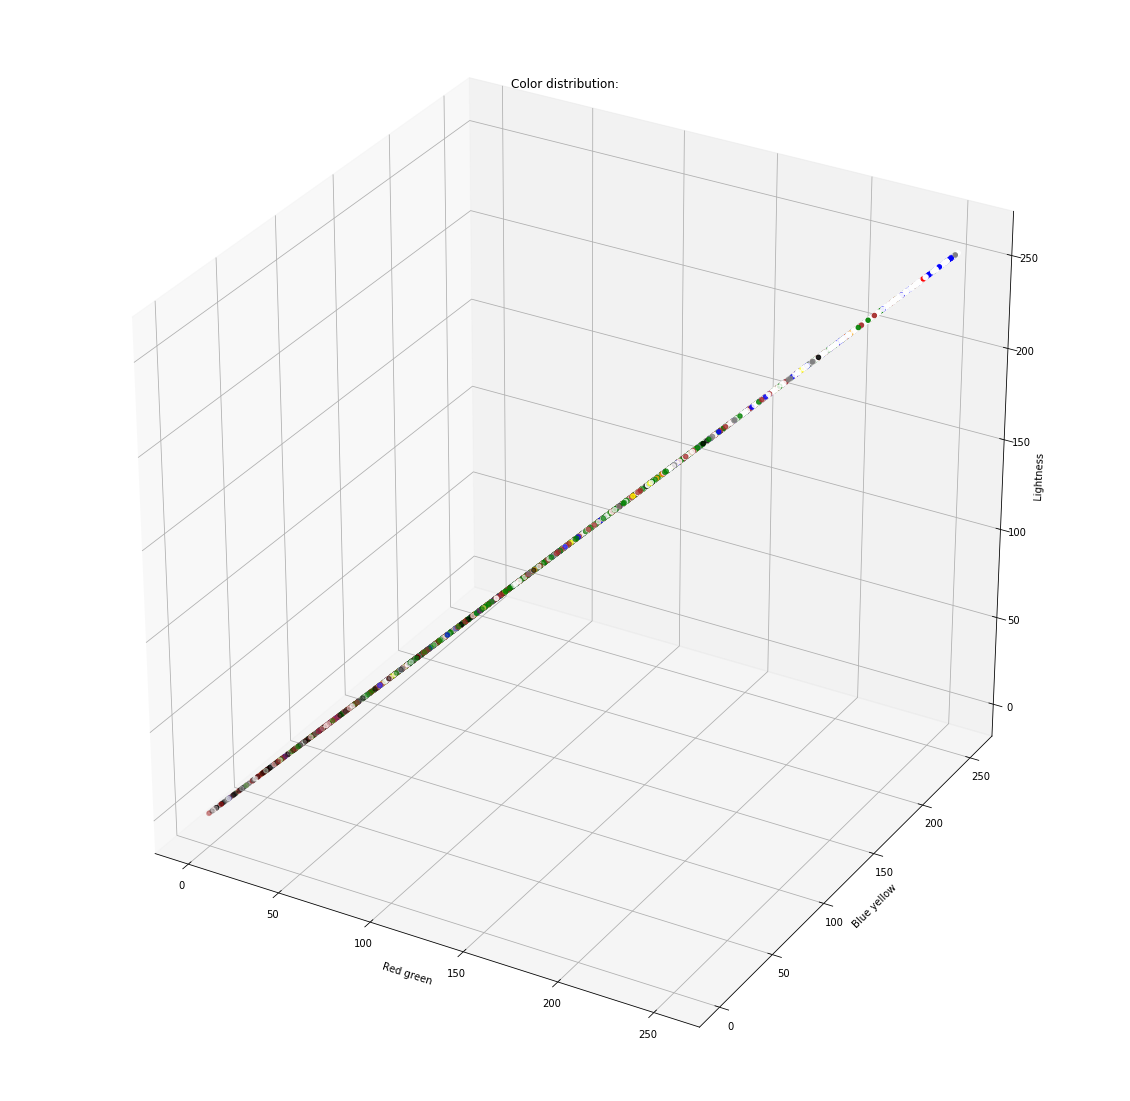

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
M = np.random.rand(10, 10, 10)
plt.rcParams["figure.figsize"] = (20,20)


#clf = svm.SVC( kernel='rbf',  class_weight='balanced', degree=3,   tol = 1e-5 ) # Linear Kernel


#Train the model using the training sets
#clf.fit(x1, color_data_codes)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#plt.clf()
ax.scatter(new_data['lightness'], new_data['redgreen'],  new_data['blueyellow'], c=new_data["color"])
ax.set_xlabel('Red green')
ax.set_ylabel('Blue yellow')
ax.set_zlabel('Lightness')
ax.set_title("Color distribution:")
#vectores = clf.support_
#print(vectores)
plt.show()

In [5]:

#test_data = pd.read_csv(test_path)

#training_data = new_data

y = training_data["color"]
x = training_data.drop( ["color"]  , axis=1)
color_data = training_data["color"]

#x = training_data.drop(["color","texture"], axis=1).iloc[:,6:]
print(x.shape)
#x = StandardScaler().fit_transform(X = x)
print(x.shape)

polyNomial = PolynomialFeatures(3, include_bias = True, interaction_only = False)
x = polyNomial.fit_transform(x)
mx = StandardScaler()


color_data_cat = color_data.astype('category')
color_data_codes = color_data_cat.cat.codes
color_data_dict = color_data_cat.cat.categories

ys = pd.DataFrame()
ys['color'] = color_data_codes
#ys['texture'] = texture_data_codes

#x["texture"] = texture_data_codes 
#print(x.corr())
#plt.plot(x.corr())
#x['texture'] = texture_data_codes
x1_train, x1_validate, color_train, color_validate = train_test_split(x, ys,   test_size=0.2)

#x2_train, x2_validate, texture_train, texture_validate = train_test_split(x, texture_data_codes,  test_size=0.2)
#x1_train2 = np.dot(x1_train, x1_train.T)
#x1_validate2 = np.dot(x1_validate, x1_train.T)
#x2_train2 = np.dot(x2_train, x2_train.T)
#x2_validate2 = np.dot(x2_validate, x2_train.T)
#x1_train, x1_validate, x2_train, x2_validate = (scale(x1_train), scale(x1_validate), scale(x2_train), scale(x2_validate))
#x1_train['tex'] = color_train['color']
#x1_validate['tex'] = color_validate['color']
x1_train, x1_validate = (scale(x1_train), scale(x1_validate))
#x1_train = np.log(np.abs(x1_train), )
#x1_validate = np.log(np.abs(x1_validate))
#x1_train, x1_validate = (np.exp(x1_train), np.exp(x1_validate))
#x1_train, x1_validate, x2_train, x2_validate = (scale(x1_train), scale(x1_validate), scale(x2_train), scale(x2_validate))

print(x.shape)


(12006, 3)
(12006, 3)
(12006, 20)


In [6]:
def show_acc1(a1, a2):
    if len(a1.shape) > 1:
        print(str(accuracy_score(a1[:,0],a2[:,0])))
        print(str(accuracy_score(a1[:,1],a2[:,1])))
    else:
        print(str(accuracy_score(a1,a2)))
        #print(str(accuracy_score(a1[:,1],a2[:,1])))

In [7]:
def show_acc(a1, a2):
    if len(a1.shape) > 1:
        print(str(balanced_accuracy_score(a1[:,0],a2[:,0])))
        print(str(balanced_accuracy_score(a1[:,1],a2[:,1])))
    else:
        print(str(balanced_accuracy_score(a1,a2)))
        #print(str(accuracy_score(a1[:,1],a2[:,1])))
    

In [8]:
clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=20,   min_samples_split=0.01, n_jobs=-1, class_weight='balanced')
clf.fit(x1_train,color_train)
pred = clf.predict(x1_validate)
p1 = clf.predict(x1_train)
p2 = clf.predict(x1_validate)
print("balanned")
show_acc(p1,color_train.values)
show_acc(p2,color_validate.values)
print('Unbalanced')
show_acc1(p1,color_train.values)
show_acc1(p2,color_validate.values)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


balanned
0.1749220091294206
0.13249917248071166
Unbalanced
0.2847771761765931
0.27019150707743544


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [9]:
clf = DecisionTreeClassifier(max_depth=12, min_impurity_decrease=0.01)
clf.fit(x1_train,color_train)
pred = clf.predict(x1_validate)
p1 = clf.predict(x1_train)
p2 = clf.predict(x1_validate)
print("balanned")
show_acc(p1,color_train.values)
show_acc(p2,color_validate.values)
print('Unbalanced')
show_acc1(p1,color_train.values)
show_acc1(p2,color_validate.values)

balanned
0.464912150617012
0.45398291319260475
Unbalanced
0.3792169929196168
0.36927560366361367


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [21]:
clf = ExtraTreeClassifier(max_depth=10, min_impurity_decrease=0.0011,  class_weight='balanced'  )
clf.fit(x1_train,color_train)
pred = clf.predict(x1_validate)
p1 = clf.predict(x1_train)
p2 = clf.predict(x1_validate)
print("balanned")
show_acc(p1,color_train.values)
show_acc(p2,color_validate.values)
print('Unbalanced')
show_acc1(p1,color_train.values)
show_acc1(p2,color_validate.values)

balanned
0.17940226436437426
0.1598832639922252
Unbalanced
0.23469387755102042
0.220233139050791


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [22]:
clf = KNeighborsClassifier( n_neighbors=20, n_jobs=-1, leaf_size=5 ,  )
clf.fit(x1_train,color_train)
pred = clf.predict(x1_validate)
p1 = clf.predict(x1_train)
p2 = clf.predict(x1_validate)
print("balanned")
show_acc(p1,color_train.values)
show_acc(p2,color_validate.values)
print('Unbalanced')
show_acc1(p1,color_train.values)
show_acc1(p2,color_validate.values)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


balanned
0.34222856864227197
0.2399028669931141
Unbalanced
0.44096209912536444
0.3784346378018318


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [23]:
clf = RadiusNeighborsClassifier( radius=100  )
clf.fit(x1_train,color_train)
pred = clf.predict(x1_validate)
p1 = clf.predict(x1_train)
p2 = clf.predict(x1_validate)
print("balanned")
show_acc(p1,color_train.values)
show_acc(p2,color_validate.values)
print('Unbalanced')
show_acc1(p1,color_train.values)
show_acc1(p2,color_validate.values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:404: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  SupervisedIntegerMixin.fit(self, X, y)


balanned
0.35755935027072056
0.35387177352206495
Unbalanced
0.35755935027072056
0.35387177352206495


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [24]:
clf = GradientBoostingClassifier(learning_rate=0.005, max_depth=20, n_estimators=20)
clf.fit(x1_train,color_train.loc[:,'color'])
pred = clf.predict(x1_validate)
p1 = clf.predict(x1_train)
p2 = clf.predict(x1_validate)
print("balanned")
show_acc(p1,color_train.values)
show_acc(p2,color_validate.values)
print('Unbalanced')
show_acc1(p1,color_train.values)
show_acc1(p2,color_validate.values)

balanned
0.6811945968763191
0.35387177352206495
Unbalanced
0.37088713036234905
0.35387177352206495


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


In [25]:
clf = svm.SVC( kernel='poly',  gamma='auto',    class_weight='balanced', degree=3,   tol = 1e-5 ) # Linear Kernel
clf.fit(x1_train, color_train)
pred = clf.predict(x1_validate)
print(clf.score(x1_train, color_train))
print("Accuracy:",metrics.accuracy_score(color_validate, pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2965431070387339
Accuracy: 0.2893422148209825


In [15]:

clf = RandomForestClassifier(n_estimators=12, max_leaf_nodes=10,   min_samples_split=0.01,  n_jobs=-1 )
sel = RFECV(estimator=clf, step=2, cv=50)
sel = sel.fit(x1_train,color_train)
sel.support_
#clf.fit(x1_train,color_train)
#pred = clf.predict(x1_validate)
#p1 = clf.predict(x1_train)
#p2 = clf.predict(x1_validate)
#show_acc(p1,color_train.values)
#show_acc(p2,color_validate.values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 39 members, which is less than n_splits=50.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: 

In [ ]:
print(sel.get_support())

In [ ]:
print(len(sel.get_support()))